In [24]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [13]:
#tf.reduce系列
a = tf.constant([[1., 2., 3.], [2., 3., 4.,]], dtype=tf.float32)
print(a)
b = tf.cast(a, dtype=tf.int32)
print(b)
c = tf.reduce_min(a)
d = tf.reduce_max(a)
print(c, d)
e = tf.reduce_mean(a, axis=0)
f = tf.reduce_sum(a,axis=1)
print(e,'\n',f)


tf.Tensor(
[[1. 2. 3.]
 [2. 3. 4.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1 2 3]
 [2 3 4]], shape=(2, 3), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor([1.5 2.5 3.5], shape=(3,), dtype=float32) 
 tf.Tensor([6. 9.], shape=(2,), dtype=float32)


In [25]:
#四则运算及开方、次方和平方根
a = tf.ones([1,3])
b = tf.fill([1,3], 4.)
print(a,'\n',b)
print(tf.add(a,b))
print(tf.subtract(a,b))
print(tf.multiply(a,b))
print(tf.divide(b,a))
print(tf.square(b))
print(tf.pow(b,3))
print(tf.sqrt(b))

# 矩阵乘法
c = tf.ones([3,2])
d = tf.fill([2,3], 3.)
print(tf.matmul(c, d))

tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32) 
 tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[5. 5. 5.]], shape=(1, 3), dtype=float32)
tf.Tensor([[-3. -3. -3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)
tf.Tensor([[64. 64. 64.]], shape=(1, 3), dtype=float32)
tf.Tensor([[2. 2. 2.]], shape=(1, 3), dtype=float32)
tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


In [27]:
# 生成“输入特征/标签”对
features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
for element in dataset:
    print(element)

(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [5]:
# with上下文管理器
class Foo():
  def __enter__(self):
    print("enter called")
  def __exit__(self, exc_type, exc_val, exc_tb):
    print("exit called")
    print("exc_type :%s"%exc_type)
    print("exc_val :%s"%exc_val)
    print("exc_tb :%s"%exc_tb)


with Foo() as foo:
  print("hello python")
  a = 1/0
  print("hello end")

enter called
hello python
exit called
exc_type :<class 'ZeroDivisionError'>
exc_val :division by zero
exc_tb :<traceback object at 0x7f086c078640>


ZeroDivisionError: division by zero

In [4]:
# tf.GradientTape
with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.))
    loss = tf.pow(w, 2)
grad = tape.gradient(loss, w)
print(grad)


tf.Tensor(6.0, shape=(), dtype=float32)


In [5]:
# tf.nn.softmax使参数缝合概率分布
print(tf.nn.softmax(tf.constant([1., 2., 3.])))

tf.Tensor([0.09003057 0.24472848 0.66524094], shape=(3,), dtype=float32)


In [6]:
0.09003057+0.24472848+0.66524094

0.9999999900000001

In [8]:
# 自更新
w = tf.Variable(4)
w.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>

In [24]:
#tf.argmax找某一维度最大值的索引
a = tf.constant([[1,2,3], [2,3,4], [5,4,3], [8,7,2]])
print(a)
print(tf.argmax(a,axis=0))
print(tf.argmax(a,axis=1))

tf.Tensor(
[[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]], shape=(4, 3), dtype=int32)
tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


In [15]:
#sklearn库和pandas库
from sklearn import datasets
from pandas import DataFrame
import pandas as pd

x_data = datasets.load_iris().data  # .data返回iris数据集所有输入特征
y_data = datasets.load_iris().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # 为表格增加行索引（左侧）和列标签（上方）
pd.set_option('display.unicode.east_asian_width', True)  # 设置列名对齐
print("x_data add index: \n", x_data)

x_data['类别'] = y_data  # 新加一列，列标签为‘类别’，数据为y_data
print("x_data add a column: \n", x_data)

#类型维度不确定时，建议用print函数打印出来确认效果

x_data from datasets: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

In [30]:
# numpy中的seed()和shuffle()函数
import numpy as np
x_data = [1, 11, 111, 1111]
y_data = [1, 2, 3, 4]
# 对应关系为1-1，,11-2，,111-3,1111-4
np.random.seed(66) #括号里的为一个随机数，不重要
np.random.shuffle(x_data) #让x_data乱序
np.random.seed(66) #同样的随机数
np.random.shuffle(y_data) # 在同一个随机数的作用下，y_data乱序的规则也一样
print(x_data)
print(y_data)

[111, 11, 1111, 1]
[3, 2, 4, 1]


In [32]:
a = [2,3,4,5]
print(a.batch(2))
      

AttributeError: 'list' object has no attribute 'batch'

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614396095276
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250555872917
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399839997292
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637542128563
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851298674941063
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875493764877
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684469103813
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Epoch 112, loss: 0.06586050614714622
Test_acc: 0.9
--------------------------
Epoch 113, loss: 0.06558268330991268
Test_acc: 0.9
--------------------------
Epoch 114, loss: 0.06530773546546698
Test_acc: 0.9
--------------------------
Epoch 115, loss: 0.06503560114651918
Test_acc: 0.9
--------------------------
Epoch 116, loss: 0.06476627010852098
Test_acc: 0.9
--------------------------
Epoch 117, loss: 0.0644997013732791
Test_acc: 0.9333333333333333
--------------------------
Epoch 118, loss: 0.06423585209995508
Test_acc: 0.9333333333333333
--------------------------
Epoch 119, loss: 0.06397469434887171
Test_acc: 0.9333333333333333
--------------------------
Epoch 120, loss: 0.06371619366109371
Test_acc: 0.9333333333333333
--------------------------
Epoch 121, loss: 0.06346031092107296
Test_acc: 0.9333333333333333
--------------------------
Epoch 122, loss: 0.06320701260119677
Test_acc: 0.9333333333333333
--------------------------
Epoch 123, loss: 0.06295627076178789
Test_acc: 0.9333

Test_acc: 1.0
--------------------------
Epoch 226, loss: 0.046348823234438896
Test_acc: 1.0
--------------------------
Epoch 227, loss: 0.04624664504081011
Test_acc: 1.0
--------------------------
Epoch 228, loss: 0.04614521004259586
Test_acc: 1.0
--------------------------
Epoch 229, loss: 0.04604450147598982
Test_acc: 1.0
--------------------------
Epoch 230, loss: 0.0459445109590888
Test_acc: 1.0
--------------------------
Epoch 231, loss: 0.045845236629247665
Test_acc: 1.0
--------------------------
Epoch 232, loss: 0.045746659860014915
Test_acc: 1.0
--------------------------
Epoch 233, loss: 0.0456487787887454
Test_acc: 1.0
--------------------------
Epoch 234, loss: 0.04555159900337458
Test_acc: 1.0
--------------------------
Epoch 235, loss: 0.0454550925642252
Test_acc: 1.0
--------------------------
Epoch 236, loss: 0.04535926412791014
Test_acc: 1.0
--------------------------
Epoch 237, loss: 0.0452641062438488
Test_acc: 1.0
--------------------------
Epoch 238, loss: 0.04516

Epoch 351, loss: 0.03753953380510211
Test_acc: 1.0
--------------------------
Epoch 352, loss: 0.03749124752357602
Test_acc: 1.0
--------------------------
Epoch 353, loss: 0.03744319686666131
Test_acc: 1.0
--------------------------
Epoch 354, loss: 0.03739538788795471
Test_acc: 1.0
--------------------------
Epoch 355, loss: 0.03734781965613365
Test_acc: 1.0
--------------------------
Epoch 356, loss: 0.03730047354474664
Test_acc: 1.0
--------------------------
Epoch 357, loss: 0.037253367248922586
Test_acc: 1.0
--------------------------
Epoch 358, loss: 0.037206494715064764
Test_acc: 1.0
--------------------------
Epoch 359, loss: 0.03715984430164099
Test_acc: 1.0
--------------------------
Epoch 360, loss: 0.03711343323811889
Test_acc: 1.0
--------------------------
Epoch 361, loss: 0.03706724150106311
Test_acc: 1.0
--------------------------
Epoch 362, loss: 0.037021270021796227
Test_acc: 1.0
--------------------------
Epoch 363, loss: 0.03697552578523755
Test_acc: 1.0
----------

Test_acc: 1.0
--------------------------
Epoch 459, loss: 0.03341847471892834
Test_acc: 1.0
--------------------------
Epoch 460, loss: 0.03338842140510678
Test_acc: 1.0
--------------------------
Epoch 461, loss: 0.03335847705602646
Test_acc: 1.0
--------------------------
Epoch 462, loss: 0.03332865331321955
Test_acc: 1.0
--------------------------
Epoch 463, loss: 0.033298940397799015
Test_acc: 1.0
--------------------------
Epoch 464, loss: 0.03326933644711971
Test_acc: 1.0
--------------------------
Epoch 465, loss: 0.03323985682800412
Test_acc: 1.0
--------------------------
Epoch 466, loss: 0.03321048431098461
Test_acc: 1.0
--------------------------
Epoch 467, loss: 0.03318122588098049
Test_acc: 1.0
--------------------------
Epoch 468, loss: 0.0331520726904273
Test_acc: 1.0
--------------------------
Epoch 469, loss: 0.03312302753329277
Test_acc: 1.0
--------------------------
Epoch 470, loss: 0.03309410251677036
Test_acc: 1.0
--------------------------
Epoch 471, loss: 0.0330

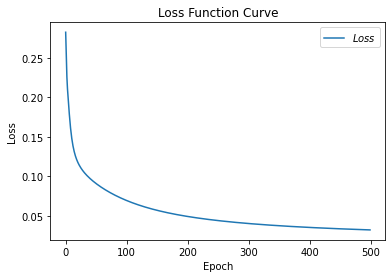

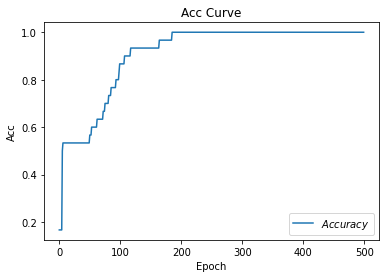

In [33]:
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()